In [1]:
!ls

ipy.ipy
notes.txt
rbfinterp_time.gonzales.jax.numpy.cpu.jit.txt
rbfinterp_time.gonzales.jax.numpy.cpu.nojit.txt
rbfinterp_time.gonzales.numpy.cpu.jit.txt
rbfinterp_time.gonzales.numpy.cpu.nojit.txt
rbfinterp_time.gonzales.torch.cpu.jit.txt
rbfinterp_time.gonzales.torch.cpu.nojit.txt
timings_cpu.ipynb


In [2]:
import numpy as np

In [3]:
dtyp = np.dtype([("N", float), ("time, s", float), ("err, s", float)])
data = np.loadtxt("rbfinterp_time.gonzales.numpy.cpu.nojit.txt", dtype=dtyp, skiprows=1, delimiter=',')

In [4]:
import matplotlib.pyplot as plt

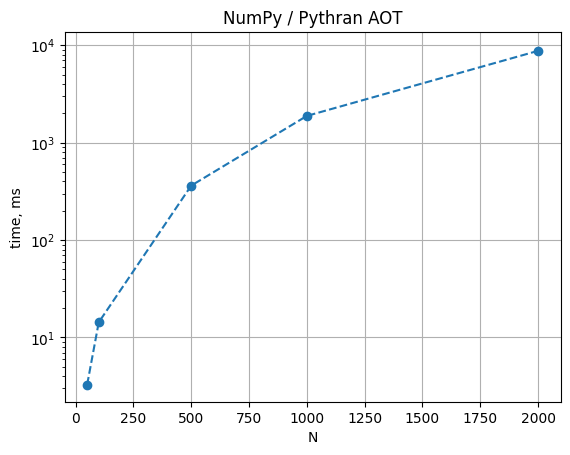

In [5]:
plt.errorbar(data["N"], data["time, s"]*1000, yerr=data["err, s"]*1000, fmt='o--')
#plt.gca().set_xscale("log")
plt.gca().set_yscale("log")

plt.gca().set_xlabel("N")
plt.gca().set_ylabel("time, ms")
plt.gca().set_title("NumPy / Pythran AOT")
plt.grid(True)

In [6]:
cpu_dct = {}
for backend in ["numpy", "torch", "jax.numpy"]:
    for jit in ["jit", "nojit"]:
        fname = f"rbfinterp_time.gonzales.{backend}.cpu.{jit}.txt"
        key = f"{backend}.{jit}"
        cpu_dct[key] = np.loadtxt(fname, dtype=dtyp, skiprows=1, delimiter=',')

In [7]:
cpu_dct

{'numpy.jit': array([(  50., 3.32218357e-02, 9.26441683e-04),
        ( 100., 1.39367717e-01, 1.13168978e-03),
        ( 500., 4.35498375e+00, 2.46745087e-01),
        (1000., 1.63700964e+01, 9.91382281e-02),
        (2000., 5.84837059e+01, 1.13239092e+00)],
       dtype=[('N', '<f8'), ('time, s', '<f8'), ('err, s', '<f8')]),
 'numpy.nojit': array([(  50., 3.28470370e-03, 2.63330364e-05),
        ( 100., 1.43185519e-02, 3.71303407e-04),
        ( 500., 3.62854883e-01, 5.37528777e-03),
        (1000., 1.88540790e+00, 3.83517245e-02),
        (2000., 8.78138860e+00, 4.08250474e-01)],
       dtype=[('N', '<f8'), ('time, s', '<f8'), ('err, s', '<f8')]),
 'torch.jit': array([(  50., 1.13380067e-03, 1.03948621e-05),
        ( 100., 3.95981513e-03, 5.45400437e-04),
        ( 500., 1.18730548e-01, 4.44639488e-03),
        (1000., 5.53392117e-01, 5.96735922e-03),
        (2000., 2.29016174e+00, 1.69760636e-01)],
       dtype=[('N', '<f8'), ('time, s', '<f8'), ('err, s', '<f8')]),
 'torch.nojit'

In [8]:
labels = {
    "numpy.nojit": "pythran aot", "torch.nojit": "torch eager", "jax.numpy.nojit": "jax eager",
    "numpy.jit": "numba jit", "jax.numpy.jit": "jax jit", "torch.jit": "torch jit"
         }

Text(0.5, 1.0, 'Evaluation time (smaller is better)')

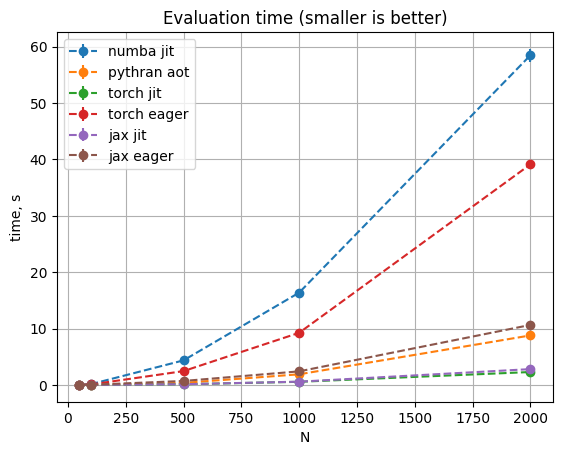

In [9]:
for key in cpu_dct:
    arr = cpu_dct[key]
    plt.errorbar(arr["N"], arr["time, s"], yerr=arr["err, s"], fmt='o--', label=labels[key])
plt.legend(loc='best')
plt.grid(True)
plt.gca().set_xlabel("N")
plt.gca().set_ylabel("time, s")
plt.gca().set_title("Evaluation time (smaller is better)")

In [10]:
speedups = {}

for key in cpu_dct:
    if key == "numpy.nojit":
        continue
    arr = cpu_dct[key]
    speedup = arr.copy()
    speedup["time, s"] = cpu_dct["numpy.nojit"]["time, s"] / speedup["time, s"]
    speedups[key] = speedup

In [11]:
speedups

{'numpy.jit': array([(  50., 0.09887183, 9.26441683e-04),
        ( 100., 0.10273937, 1.13168978e-03),
        ( 500., 0.08331946, 2.46745087e-01),
        (1000., 0.1151739 , 9.91382281e-02),
        (2000., 0.15015103, 1.13239092e+00)],
       dtype=[('N', '<f8'), ('time, s', '<f8'), ('err, s', '<f8')]),
 'torch.jit': array([(  50., 2.89707335, 1.03948621e-05),
        ( 100., 3.61596473, 5.45400437e-04),
        ( 500., 3.05612067, 4.44639488e-03),
        (1000., 3.40700173, 5.96735922e-03),
        (2000., 3.83439669, 1.69760636e-01)],
       dtype=[('N', '<f8'), ('time, s', '<f8'), ('err, s', '<f8')]),
 'torch.nojit': array([(  50., 0.1599976 , 6.66317001e-05),
        ( 100., 0.17366444, 9.98161924e-04),
        ( 500., 0.14795031, 3.35836156e-01),
        (1000., 0.20396275, 1.84420797e-01),
        (2000., 0.22444695, 1.59889976e-01)],
       dtype=[('N', '<f8'), ('time, s', '<f8'), ('err, s', '<f8')]),
 'jax.numpy.jit': array([(  50., 2.66548675, 8.60145437e-05),
        ( 10

Text(0.5, 1.0, 'Speedups relative to Pythran AOT (larger is better)')

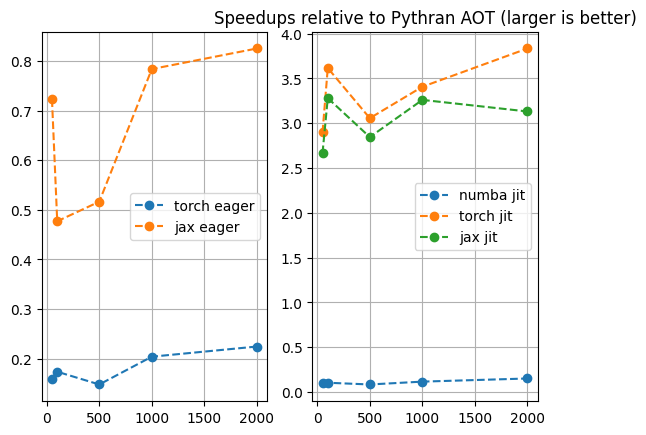

In [12]:
fix, axx = plt.subplots(1, 2)

for key in speedups:
    ax = axx[0] if "nojit" in key else axx[1]
    arr = speedups[key]
    ax.plot(arr["N"], arr["time, s"], 'o--', label=labels[key])

for ax in axx:
    ax.legend(loc='best')
    ax.grid(True)

plt.title("Speedups relative to Pythran AOT (larger is better)")